___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Nome 1 - João Laet Toledo César

## Nome 2 - Pedro Isidoro

## Nome 3 - Vinicius Hsu

___

___

## INTRODUÇÃO

[Detalhe aqui o objetivo deste projeto!!]

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [58]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet as ElasticNetImpl
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [19]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Documents\2 SEMESTRE\Ciencia dos Dados\DP\Projeto 3


### BASE DE DADOS

In [21]:
dados = pd.read_excel('carros.xlsx')
dados.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [22]:
df = dados[['cylinders','hp','time-to-60']].copy()

In [23]:
df.loc[(dados.mpg>0)|(dados.mpg<1000), 'Consumo(Km/L)']=dados.mpg*0.425
df.loc[(dados.weightlbs>0)|(dados.weightlbs<100000), 'Peso']=dados.weightlbs*0.453592
df.loc[(dados.cubicinches>0)|(dados.cubicinches<1000), 'Cilindradas(L)']=dados.cubicinches/0.061024/1000

In [24]:
df = df.rename(index=str, columns={"cylinders": "Cilindros", "hp": "Potência(hp)", "time-to-60":"0-100(s)" })
df.head()

,Cilindros,Potência(hp),0-100(s),Consumo(Km/L),Peso,Cilindradas(L)
0,8,165,12,5.9500,1909.168728,5.735448
1,4,71,14,13.5575,873.164600,1.458443
2,8,140,11,7.2250,1564.438808,4.948873
3,8,150,10,6.3750,1705.959512,6.554798
4,4,63,17,12.9625,930.317192,1.605926


In [25]:
df=shuffle(df)
tamanhodf= len(df)

dftreino = df.iloc[0:int(tamanhodf*0.75), :]
dfteste = df.iloc[int(tamanhodf*0.75):, :]

### ANÁLISE DESCRITIVA

As variáveis a serem utilizadas são: quantidade de cilíndros no motor do carro, a potência, tempo de aceleração de 0 a 100 km/h, o peso do veículo e a capacidade volumétrica do motor, além da variável a ser predizida que será o consumo em km/L.

Com a utilização da variáveis descritas acima, pretende-se criar diferentes modelos de predição à fim de encontrar um que se encaixe melhor no propósito do trabalho, predizer o consumo baseado nas variáveis escolhidas. Esta variáveis serão as utilizadas, pois dentro do dataset original foram as que, o grupo julgou terem papel influente no consumo de combustível.

A quantidade de cilíndros, bem como a capacidade volumétrica do motor (diretamente ligada ao tamanho dos cilíndros), influência na quantidade de combustível gasta em um ciclo do motor.

A potência e o tempo de 0 a 100 km/h tem provável correlaçao com a velocidade de consumo de combustível, ou seja a rapidez de um ciclo do motor.

E finalmente o peso, que influência diretamente no trabalho realizado, ou seja, a força necessária para movimentar o veículo. Quanto maior o peso, maior o trabalho, e portanto, maior o gasto de combustível.

___
## MODELOS DE PREDIÇÃO


[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

### MODELO DE PREDIÇÃO PELA MÉDIA

In [26]:
média =np.mean(dftreino["Consumo(Km/L)"])

#### PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO 

In [27]:
listaRMSmédiaTreino=[]
listaRMSmédiaTeste=[]
listaRMSmédiaTotal=[]

for i in dftreino["Consumo(Km/L)"]:
    a = (i-média)**2
    listaRMSmédiaTreino.append(a)
    
for i in dfteste["Consumo(Km/L)"]:
    b = (i-média)**2
    listaRMSmédiaTeste.append(b)
    
for i in df["Consumo(Km/L)"]:
    c = (i-média)**2
    listaRMSmédiaTotal.append(c)
    
RMS_média_treino = (1/len(dfteste))*sum(listaRMSmédiaTeste)
RMS_média_teste = (1/len(dftreino))*sum(listaRMSmédiaTreino)

R_quadrado_treino=1-(sum(listaRMSmédiaTreino)/sum(listaRMSmédiaTotal))
R_quadrado_teste=1-(sum(listaRMSmédiaTeste)/sum(listaRMSmédiaTotal))

print("RMS da base de treino: {}".format(RMS_média_treino))
print("R\u00b2 da base de treino: {}\n".format(R_quadrado_treino))
print("RMS da base de teste: {}".format(RMS_média_teste))
print("R\u00b2 da base de teste: {}".format(R_quadrado_teste))

RMS da base de treino: 9.860114919704863
R² da base de treino: 0.2211710706358162

RMS da base de teste: 11.57376011284722
R² da base de teste: 0.7788289293641844


O modelo preditivo por média apresentou resultados interessantes. Com o cálculo do RMS e do R² tanto para o dataframe de treino quanto para o de testes é possível fazer uma breve comparação entre os dois. COntrariando a expectativa, a predição pela média obteve melhor resultado ao ser utilizada com o dataframe de treino e não com o de testes como era esperado a príncipio, por se tratar do dataframe originário do treinamento. 

A partir de uma avaliação dos valores calculados e sabendo que quanto mais próximo o RMS está de 0 mais a previsão corresponde aos valores da base utilizada para verificar sua qualidade, é possível perceber que o comprovação feito com a base de teste possui um valor menor e portanto corresponde melhor à realidade. Além disso, o cálculo do R² mostra em porcentagem o quanto a previsão consegue explicar os valores comparados, ou seja, oteve-se uma equivalência de quase 73% na utilização da predição pela média com o dataframe de testes equanto o de treinamento teve apenas 27%, aproximadamente.

Como ainda não foram realizados outros tipos de predição não da para se afirmar com convicção se essa predição esta mais próxima de "overfitting" ou "underfitting", mas com o baixo resultado em relação ao dataframe de treino é muito provável que este seja um caso de prediçao com "underfitting" ao passo que a com o dataframe de teste esteja mais próxima do "overfitting", apesar de essa ser uma avaliação superficial, é a única que é possível ser feito por enquanto

## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

Nesta seção será elaborado um modelo estatístico capaz de nos mostrar a relação linear de múltiplas variáveis
## Treinamento

In [28]:
dftreino.head()

,Cilindros,Potência(hp),0-100(s),Consumo(Km/L),Peso,Cilindradas(L)
139,4,96,14,13.600,1208.822680,2.359727
201,4,65,19,17.340,957.079120,1.392895
161,4,54,24,9.775,1022.396368,1.589539
50,4,75,16,10.200,978.851536,1.900891
5,8,125,17,9.775,1769.008800,5.735448


In [42]:
X = dftreino[["Cilindros", "Potência(hp)", "0-100(s)", "Peso", "Cilindradas(L)" ]]
Y = dftreino["Consumo(Km/L)"]


In [73]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Consumo(Km/L)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     699.7
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          5.69e-119
Time:                        01:25:56   Log-Likelihood:                -436.19
No. Observations:                 192   AIC:                             882.4
Df Residuals:                     187   BIC:                             898.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Cilindros          1.0650      0.293      3.640      0.000         0.488     1.642
Potência(hp)       0.0579      0.010      5.878      0.000         0.038     0.077
0-100(s)           0.7527      0.053     14.247      0.000         0.648     0.857
Peso              -0.0069      0.001     -5.240      0.000        -0.010    -0.004
Cilindradas(L)    -1.4209      0.373     -3.807      0.000        -2.157    -0.685
==============================================================================
Omnibus:                        6.030   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.829
Skew:                           0.344   Prob(JB):                       0.0542
Kurtosis:                       3.506   Cond. No.                     3.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
lm = linear_model.LinearRegression()
model1 = lm.fit(X, Y)
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

 ##### BETA 1 
 Enquanto a quantidade de cilindros do motor do veículo aumenta em 1,  o consumo aumenta em 1,065 Km/L
 
 Enquanto a potência do motor do veículo aumenta em 1,  o consumo aumenta em 0,0579 Km/L
 
 Enquanto o tempo de aceleração do veículo de 0 a 100 km/h aumenta em 1 segundo,  o consumo aumenta em 1,065 Km/L
 
 Enquanto o peso do veículo aumenta em 1 Kg,  o consumo diminui em 0,069 Km/L
 
 Enquanto o tamanho (cilindrada) do motor do veículo aumenta em 1 L,  o consumo diminui em 1,4209  Km/L
 
 ##### R²
 O quanto de variação que através de uma aproximação linear o nosso modelo explica, em porcentagem. No caso 94,9%
 
 ##### Confiabilidade
 95%

## Teste
Com um modelo definido, iremos realizar as predições sobre os valores da variável dependente (consumo), de acordo com
as variaveis independentes (demais) da base de dados "Teste". O resultado será comparado com os reais valores de consumo
da base de dados Teste, para que possamos verificar a proporção de acertos de nosso modelo.

In [65]:
Xteste = dfteste[["Cilindros", "Potência(hp)", "0-100(s)", "Peso", "Cilindradas(L)" ]]
Yteste = dfteste["Consumo(Km/L)"]

In [78]:
lm = linear_model.LinearRegression()
model2 = lm.fit(X, Y)

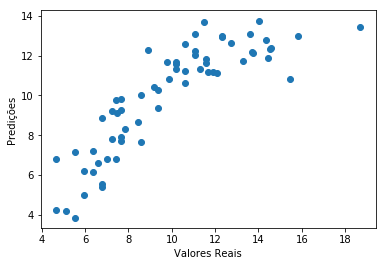

In [84]:
predicao = model2.predict(Xteste)

plt.scatter(Yteste, predicao)

plt.xlabel("Valores Reais")
plt.ylabel("Predições")


In [80]:
print("Score:", model2.score(Xteste, Yteste))

Score: 0.731402422582


 Em 73,14% das vezes nosso modelo baseado em regressão linear foi capaz de acertar os valores de Consumo do veículo,
 tomando como base fatores como quantidade de cilindros do motor do veículo, o tamanho do motor, 
 a aceleração do veículo, a potência do motor e o peso do veículo.

#### PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO 

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS